In [1]:
import tifffile
import matplotlib.pyplot as plt
from pycodex.segmentation_mask import find_boundaries_joblib, plot_labels

/opt/miniforge3/envs/pycodex_3.10/lib/python3.10/site-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
segmentation_mask = tifffile.imread("../demo/data/segmentation_mask/segmentation_mask.tiff")

# 01. Plot Segmentation Labels

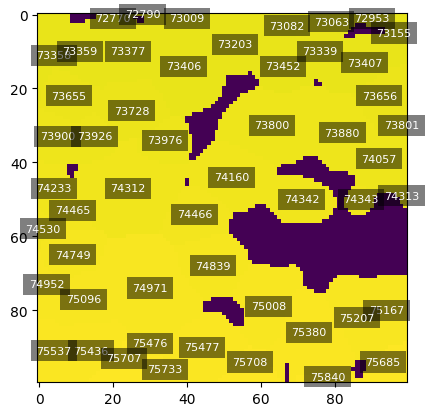

In [3]:
fig, ax = plt.subplots()
ax.imshow(segmentation_mask)
plot_labels(segmentation_mask, ax);

# 02. Get Boundaries of Segmentation Mask

In [4]:
segmentation_boundary = find_boundaries_joblib(
    segmentation_mask, connectivity=1, mode="inner"
)

Mask to boundaries:   0%|                              | 0/52 [00:00<?, ?it/s]

100%|██████████████████████████████| 52/52 [00:00<00:00, 175043.18it/s]


In [5]:
segmentation_boundary

array([[73358, 73358, 73358, ..., 73155, 73155, 73155],
       [73358,     0,     0, ...,     0,     0, 73155],
       [73358,     0,     0, ...,     0,     0, 73155],
       ...,
       [75537,     0,     0, ...,     0,     0, 75685],
       [75537,     0,     0, ...,     0,     0, 75685],
       [75537, 75537, 75537, ..., 75685, 75685, 75685]])

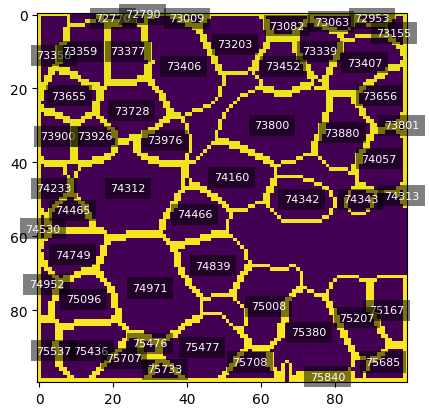

In [6]:
fig, ax = plt.subplots()
ax.imshow(segmentation_boundary)
plot_labels(segmentation_mask, ax);

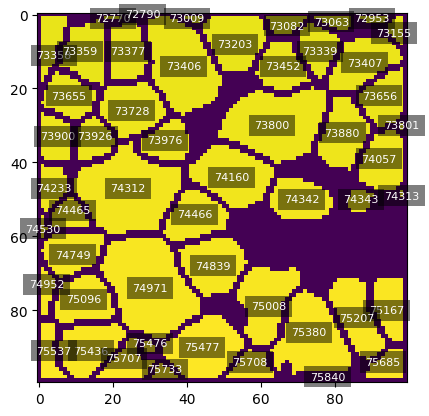

In [7]:
fig, ax = plt.subplots()
ax.imshow(segmentation_mask * ~segmentation_boundary.astype(bool))
plot_labels(segmentation_mask, ax)
